In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import plotly.express as px


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from math import sqrt

In [129]:
# Read the csv file into dataframe
df1 = pd.read_csv("df1990-1999.csv")
df1.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
5,1990-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000
6,1990-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000
7,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000
8,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000
9,1990-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000


In [130]:
df1.shape

(287196, 10)

In [131]:
# Read the csv file into dataframe
df2 = pd.read_csv("df2000-2012.csv")
df2.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
5,2000-01,ANG MO KIO,3 ROOM,320,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1977,157000.0
6,2000-01,ANG MO KIO,3 ROOM,320,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977,178000.0
7,2000-01,ANG MO KIO,3 ROOM,330,ANG MO KIO AVE 1,07 TO 09,68.0,New Generation,1981,160000.0
8,2000-01,ANG MO KIO,3 ROOM,330,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,169000.0
9,2000-01,ANG MO KIO,3 ROOM,332,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1981,205000.0


In [132]:
df2.shape

(369651, 10)

In [133]:
df3 = pd.read_csv("df2012-2014.csv")
df3.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
5,2012-03,ANG MO KIO,3 ROOM,154,ANG MO KIO AVE 5,01 TO 05,68.0,New Generation,1981,321000.0
6,2012-03,ANG MO KIO,3 ROOM,110,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1978,323000.0
7,2012-03,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1979,325000.0
8,2012-03,ANG MO KIO,3 ROOM,476,ANG MO KIO AVE 10,11 TO 15,67.0,New Generation,1979,328000.0
9,2012-03,ANG MO KIO,3 ROOM,631,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1985,330000.0


In [134]:
df4 = pd.read_csv("df2015-2016.csv")
df4.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
5,2015-01,ANG MO KIO,3 ROOM,603,ANG MO KIO AVE 5,07 TO 09,67.0,New Generation,1980,64,290000.0
6,2015-01,ANG MO KIO,3 ROOM,709,ANG MO KIO AVE 8,01 TO 03,68.0,New Generation,1980,64,290000.0
7,2015-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,65,293000.0
8,2015-01,ANG MO KIO,3 ROOM,109,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,62,300000.0
9,2015-01,ANG MO KIO,3 ROOM,564,ANG MO KIO AVE 3,13 TO 15,68.0,New Generation,1985,69,307500.0


In [135]:
df5 = pd.read_csv("df2017.csv")
df5.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [136]:
# Extract the numeric part of 'remaining_lease', split by space, and convert to integer
df5['remaining_lease'] = df5['remaining_lease'].str.split(' ').str[0].astype('int64')

# Display the updated 'remaining_lease' column
print(df5['remaining_lease'])

0         61
1         60
2         62
3         62
4         62
          ..
174346    60
174347    93
174348    62
174349    62
174350    62
Name: remaining_lease, Length: 174351, dtype: int64


In [137]:
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [138]:
df_combined.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
5,1990-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000.0,NaN
6,1990-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000.0,NaN
7,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000.0,NaN
8,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000.0,NaN
9,1990-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000.0,NaN


# Feature engineering 

Feature engineering
Since the 'month' column contains both month and year, we split the column into 'month' and 'year'.

In [139]:
# Split 'month' into 'year' and 'month' columns
df_combined[['year', 'month']] = df_combined['month'].str.split('-', expand=True)

# Convert 'year' and 'month' columns to numeric types if needed
df_combined['year'] = pd.to_numeric(df_combined['year'])
df_combined['month'] = pd.to_numeric(df_combined['month'])

In [140]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
920549,3,YISHUN,5 ROOM,231,YISHUN ST 21,07 TO 09,126.0,Improved,1985,610000.0,60.0,2024
920550,3,YISHUN,5 ROOM,513C,YISHUN ST 51,04 TO 06,113.0,Improved,2018,665000.0,93.0,2024
920551,3,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0,62.0,2024
920552,3,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62.0,2024


The first 3 datasets did not have the column 'remaining lease' and thus when we merged all 5 datasets together we have Nan values on those rows. We use the below formula to obtain the values for those Nan values. 
remaining lease = 99 - (Year - lease commence date)

In [141]:
# Calculate remaining lease for rows with NaN values
df_combined['remaining_lease'].fillna(99 - (df_combined['year'] - df_combined['lease_commence_date']), inplace=True)

In [142]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
920549,3,YISHUN,5 ROOM,231,YISHUN ST 21,07 TO 09,126.0,Improved,1985,610000.0,60.0,2024
920550,3,YISHUN,5 ROOM,513C,YISHUN ST 51,04 TO 06,113.0,Improved,2018,665000.0,93.0,2024
920551,3,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0,62.0,2024
920552,3,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62.0,2024


Now we check if there are any repetitions in the categorical values. And by doing so, we found out that there were indeed some in the columns 'flat_model' and 'flat_type', which can be simply resolved by mapping and changing the case of the characters.

In [143]:
# Changing the case to uppercase for consistency
df_combined['flat_model'] = df_combined['flat_model'].str.upper()

In [144]:
# Convert 'flat_type' values to lowercase
df_combined['flat_type'] = df_combined['flat_type'].str.lower()

# Standardize values to a common set of categories
type_mapping = {
    '1 room': '1 room',
    '3 room': '3 room',
    '4 room': '4 room',
    '5 room': '5 room',
    '2 room': '2 room',
    'executive': 'executive',
    'multi generation': 'multi generation',
    'multi-generation': 'multi generation'
}

df_combined['flat_type'] = df_combined['flat_type'].map(type_mapping)

# Changing the case to Uppercase
df_combined['flat_type'] = df_combined['flat_type'].str.upper()

In [145]:
df_combined.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,year
count,920554.000000,920554.000000,920554.000000,9.205540e+05,920554.000000,920554.000000
mean,6.567765,95.695257,1988.205606,3.187701e+05,81.063690,2006.040558
std,3.419174,25.837642,10.589613,1.687090e+05,10.726154,9.230403
min,1.000000,28.000000,1966.000000,5.000000e+03,41.000000,1990.000000
25%,4.000000,73.000000,1981.000000,1.920000e+05,74.000000,1999.000000
50%,7.000000,93.000000,1986.000000,2.950000e+05,83.000000,2005.000000
75%,10.000000,113.000000,1996.000000,4.150000e+05,90.000000,2013.000000
max,12.000000,307.000000,2022.000000,1.568888e+06,101.000000,2024.000000


In [146]:
# # Assuming 'df' is your DataFrame and 'column_name' is the column for which you want to calculate the average
# average_value = df_combined['floor_area_sqm'].mean()

# # Add the average value as a new column named 'avg_column'
# df_combined = df_combined.assign(avg_floor_area_sqm=average_value)

# # Display the DataFrame with the new 'avg_column'
# df_combined.columns

In [147]:
# plt.scatter(df_singapore['floor_area_sqm'],df_singapore['price_per_sqm'])

In [148]:
# import warnings
# import seaborn as sns

# # Suppress UserWarning
# warnings.filterwarnings("ignore", category=UserWarning)

# # Plot pairplot
# sns.pairplot(df_combined)


In [149]:
# sns.distplot(df_combined['price_per_sqm'])

In [150]:
# import geopandas as gpd

# # Load the GeoJSON file
# singapore_geojson = gpd.read_file("https://gist.github.com/cheeaun/78bb5c3bd27759a14b3cf8e6b6568080.js")

# # Display the GeoDataFrame
# print(singapore_geojson.head())


In [151]:
# Create a boolean mask to identify rows containing any of the specified values
mask = df_combined['remaining_lease']>99

# Use the boolean mask to drop rows
df_combined = df_combined[~mask]

In [152]:
# # As a step to remove ouliers-----=====
# # Drop rows where the 'storey_range' column contains specific values
# values_to_drop = ['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '31 TO 35', '36 TO 40']

# # Create a boolean mask to identify rows containing any of the specified values
# mask = df_combined['storey_range'].isin(values_to_drop)

# # Use the boolean mask to drop rows
# df_combined = df_combined[~mask]

In [178]:
# # Split the 'storey_range' into lower and upper bounds
# df_combined[['lower_bound', 'upper_bound']] = df_combined['storey_range'].str.split(' TO ', expand=True)

# # Convert the lower and upper bounds to numeric values
# df_combined['lower_bound'] = pd.to_numeric(df_combined['lower_bound'])
# df_combined['upper_bound'] = pd.to_numeric(df_combined['upper_bound'])

In [177]:
import pandas as pd

# Assuming df_combined is your DataFrame
# Split the 'storey_range' column into 'lower_bound' and 'upper_bound'
df_combined[['lower_bound', 'upper_bound']] = df_combined['storey_range'].str.split(' TO ', expand=True)

# Convert 'lower_bound' and 'upper_bound' to numeric
df_combined.loc[:, 'lower_bound'] = pd.to_numeric(df_combined['lower_bound'])
df_combined.loc[:, 'upper_bound'] = pd.to_numeric(df_combined['upper_bound'])

# Now you can use df_combined with the modified columns
# For example:
df_combined.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,remaining_lease_asof2024
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0


In [154]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,remaining_lease_asof2024,storey_median
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0,11.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0,5.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0,11.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0,8.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913660,3,YISHUN,5 ROOM,231,YISHUN ST 21,07 TO 09,126.0,IMPROVED,1985,610000.0,60.0,2024,7,9,4841.269841,39,60.0,8.0
913661,3,YISHUN,5 ROOM,513C,YISHUN ST 51,04 TO 06,113.0,IMPROVED,2018,665000.0,93.0,2024,4,6,5884.955752,6,93.0,5.0
913662,3,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,IMPROVED,1987,680000.0,62.0,2024,10,12,5619.834711,37,62.0,11.0
913663,3,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,APARTMENT,1987,851888.0,62.0,2024,10,12,5834.849315,37,62.0,11.0


In [179]:
import pandas as pd

# Assuming df_combined is your DataFrame
# Adding a new column 'price_per_sqm'
df_combined['price_per_sqm'] = df_combined['resale_price'] / df_combined['floor_area_sqm']

# Adding a new column 'years_holding'
df_combined['years_holding'] = df_combined['year'] - df_combined['lease_commence_date']

# Adding a new column 'current_remaining_lease'
df_combined['remaining_lease_asof2024'] = df_combined['remaining_lease'] - (2024 - df_combined['year'])

# Now the modifications are performed using .loc to avoid the SettingWithCopyWarning


In [180]:
df_combined.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'lower_bound', 'upper_bound',
       'price_per_sqm', 'years_holding', 'remaining_lease_asof2024'],
      dtype='object')

Finally saved the dataset to a csv file.

In [157]:
# Save it to a csv file 
df_combined = df_combined.reset_index(drop=True)
df_combined.to_csv('Singapore_resale_flat_prices_updated.csv', index=False)

# Check for Skewness

In [158]:
df_scope=df[['floor_area_sqm','resale_price','price_per_sqm','years_holding','remaining_lease_asof2024','storey_median']]
df_scope

,floor_area_sqm,resale_price,price_per_sqm,years_holding,remaining_lease_asof2024,storey_median
0,31.0,9000.0,290.322581,13,52.0,11.0
1,31.0,6000.0,193.548387,13,52.0,5.0
2,31.0,8000.0,258.064516,13,52.0,11.0
3,31.0,6000.0,193.548387,13,52.0,8.0
4,73.0,47200.0,646.575342,14,51.0,5.0
...,...,...,...,...,...,...
913660,126.0,610000.0,4841.269841,39,60.0,8.0
913661,113.0,665000.0,5884.955752,6,93.0,5.0
913662,121.0,680000.0,5619.834711,37,62.0,11.0
913663,146.0,851888.0,5834.849315,37,62.0,11.0


In [159]:
df_scope = df_scope.drop_duplicates()

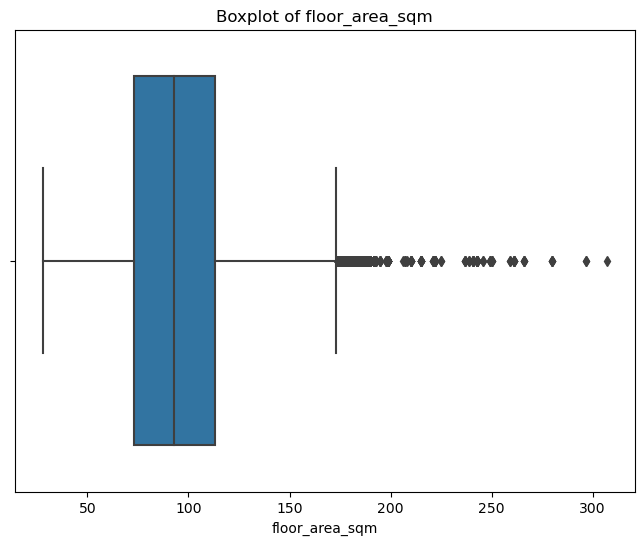

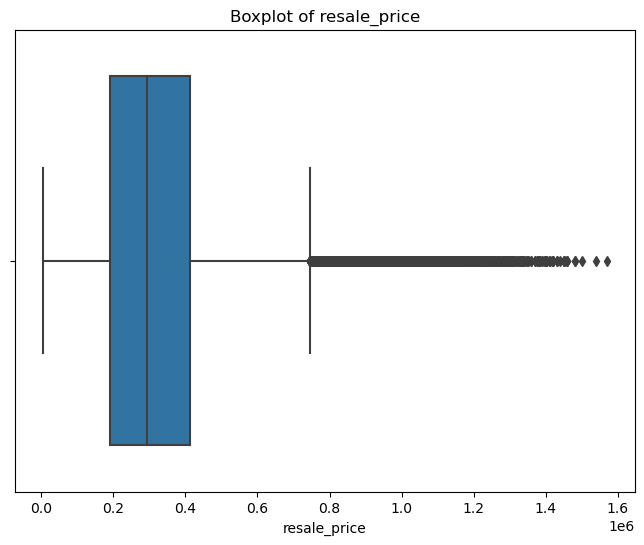

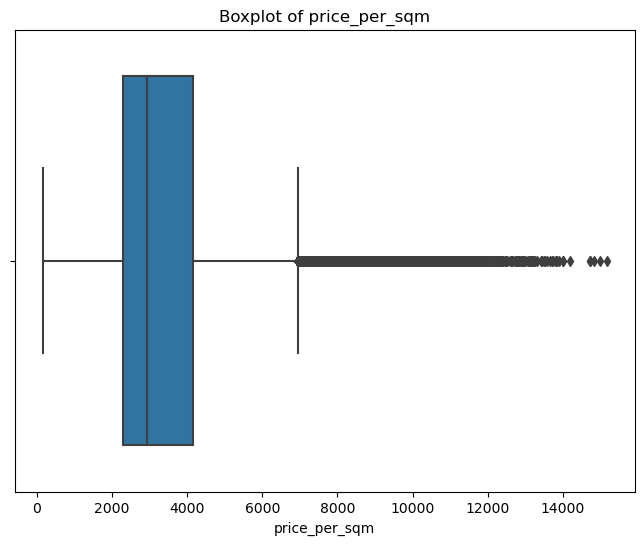

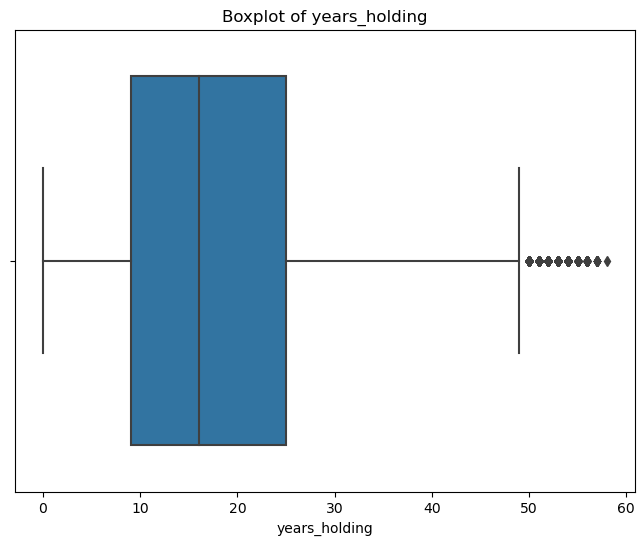

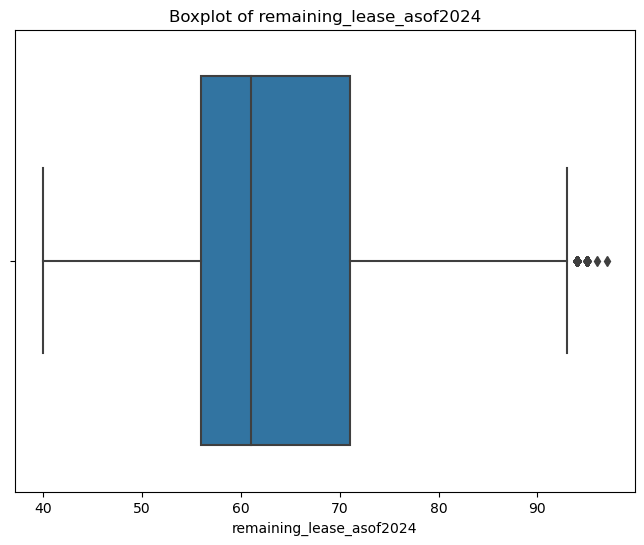

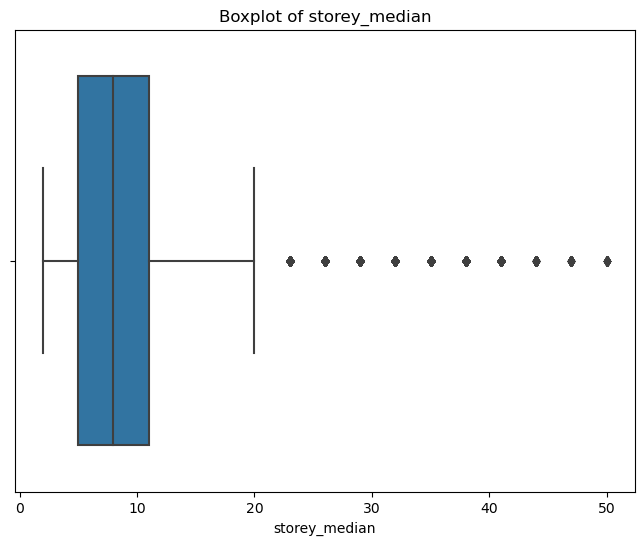

In [160]:
col = ['floor_area_sqm','resale_price','price_per_sqm','years_holding','remaining_lease_asof2024','storey_median']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [161]:
df_log = df_scope.copy()

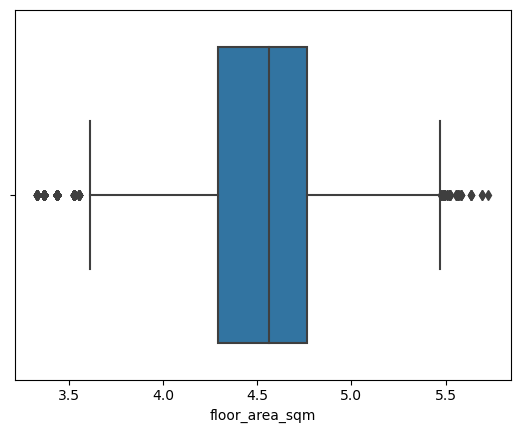

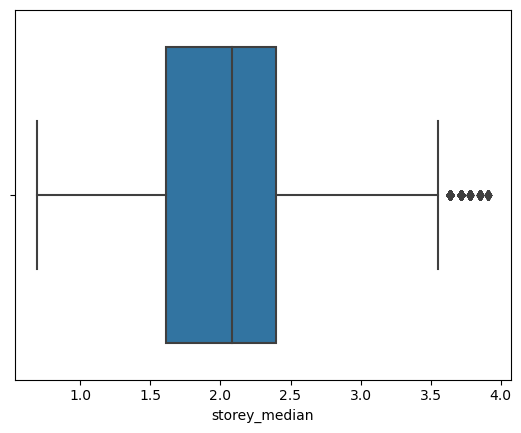

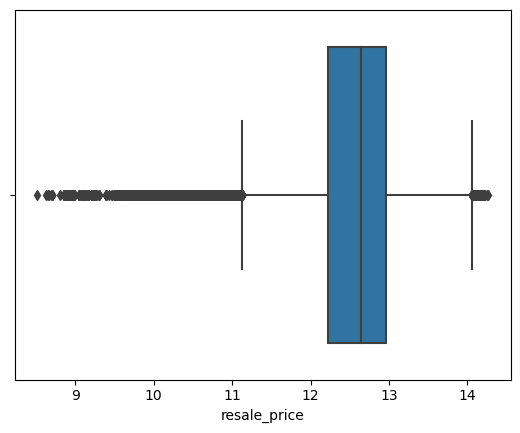

In [162]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
                                                                # effect on the data, so no need to apply for that columns
    
df_log['floor_area_sqm'] = np.log(df_log['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df_log)
plt.show()

df_log['storey_median'] = np.log(df_log['storey_median'])
sns.boxplot(x='storey_median', data=df_log)
plt.show()

df_log['resale_price'] = np.log(df_log['resale_price'])
sns.boxplot(x='resale_price', data=df_log)
plt.show()

In [163]:
df_log.dtypes

floor_area_sqm              float64
resale_price                float64
price_per_sqm               float64
years_holding                 int64
remaining_lease_asof2024    float64
storey_median               float64
dtype: object

<Axes: title={'center': 'Correlation Heatmap'}>

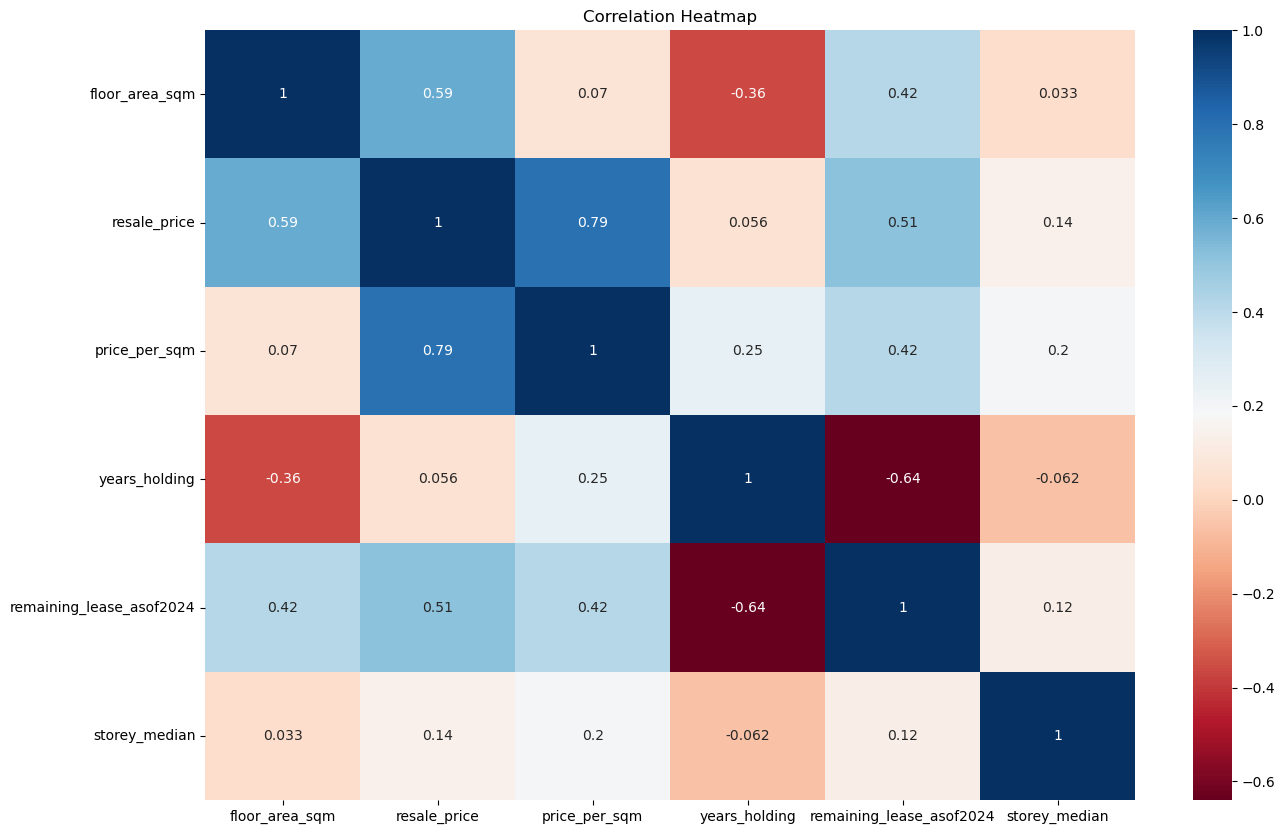

In [164]:
# heat map to visualize correlation
corrMatrix = df_log.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

# Exploratory Data Analysis (EDA)

In [165]:
# Reading the dataset
df = pd.read_csv('Singapore_resale_flat_prices_updated.csv')


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920503 entries, 0 to 920502
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   month                     920503 non-null  int64  
 1   town                      920503 non-null  object 
 2   flat_type                 920503 non-null  object 
 3   block                     920503 non-null  object 
 4   street_name               920503 non-null  object 
 5   storey_range              920503 non-null  object 
 6   floor_area_sqm            920503 non-null  float64
 7   flat_model                920503 non-null  object 
 8   lease_commence_date       920503 non-null  int64  
 9   resale_price              920503 non-null  float64
 10  remaining_lease           920503 non-null  float64
 11  year                      920503 non-null  int64  
 12  lower_bound               920503 non-null  int64  
 13  upper_bound               920503 non-null  i

In [167]:
df['floor_area_sqm'] = df_log['floor_area_sqm']
df['storey_median'] =df_log['storey_median']
df['resale_price'] = df_log['resale_price']


In [168]:
df.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,remaining_lease_asof2024,storey_median
count,920503.000000,776821.000000,920503.000000,776821.000000,920503.000000,920503.000000,920503.000000,920503.000000,920503.000000,920503.000000,920503.000000,776821.000000
mean,6.567695,4.538393,1988.205028,12.553873,81.062636,2006.041029,6.675871,8.690728,3295.439030,17.836001,63.103665,1.842150
std,3.419173,0.279454,10.589553,0.599648,10.725517,9.230364,4.814208,4.814221,1510.129084,10.652061,10.537999,0.694917
min,1.000000,3.332205,1966.000000,8.517193,41.000000,1990.000000,1.000000,3.000000,161.290323,0.000000,40.000000,0.693147
25%,4.000000,4.290459,1981.000000,12.225875,74.000000,1999.000000,4.000000,6.000000,2287.671233,9.000000,56.000000,1.609438
50%,7.000000,4.564348,1986.000000,12.637855,83.000000,2005.000000,7.000000,9.000000,2942.307692,16.000000,61.000000,2.079442
75%,10.000000,4.762174,1996.000000,12.959844,90.000000,2013.000000,10.000000,12.000000,4170.731707,25.000000,71.000000,2.397895
max,12.000000,5.726848,2022.000000,14.265878,99.000000,2024.000000,49.000000,51.000000,15170.838710,58.000000,97.000000,3.912023


In [169]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,remaining_lease_asof2024,storey_median
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,3.433987,IMPROVED,1977,9.104980,86.0,1990,10,12,290.322581,13,52.0,2.397895
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,3.433987,IMPROVED,1977,8.699515,86.0,1990,4,6,193.548387,13,52.0,1.609438
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,3.433987,IMPROVED,1977,8.987197,86.0,1990,10,12,258.064516,13,52.0,2.397895
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,3.433987,IMPROVED,1977,8.699515,86.0,1990,7,9,193.548387,13,52.0,2.079442
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,4.290459,NEW GENERATION,1976,10.762149,85.0,1990,4,6,646.575342,14,51.0,1.609438


In [170]:
df.isnull().sum()

month                            0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm              143682
flat_model                       0
lease_commence_date              0
resale_price                143682
remaining_lease                  0
year                             0
lower_bound                      0
upper_bound                      0
price_per_sqm                    0
years_holding                    0
remaining_lease_asof2024         0
storey_median               143682
dtype: int64

Using Univariate and Bivariate analysis we obtain deeper insights. 

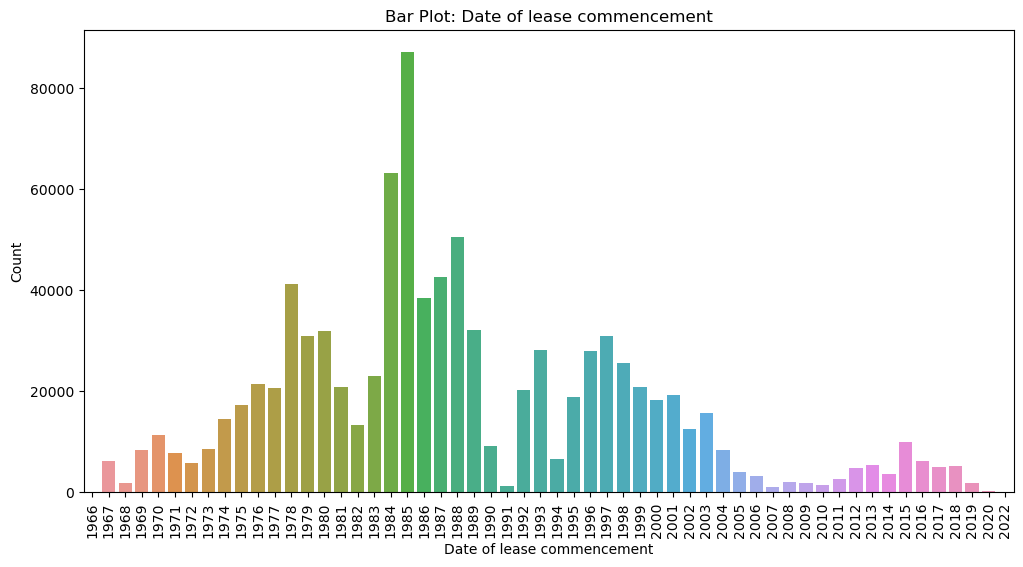

In [171]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='lease_commence_date', data=df)
plt.title('Bar Plot: Date of lease commencement')
plt.xlabel('Date of lease commencement')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

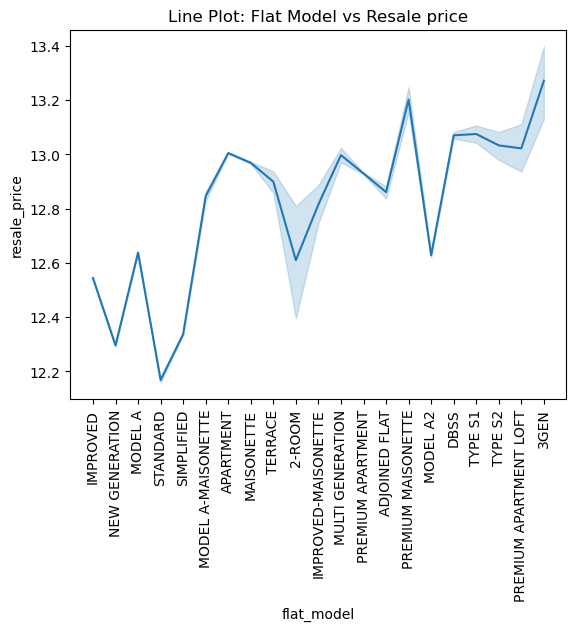

In [172]:
# Line plot
sns.lineplot(x='flat_model', y='resale_price', data=df)
plt.title('Line Plot: Flat Model vs Resale price')
plt.xticks(rotation=90)
plt.show()

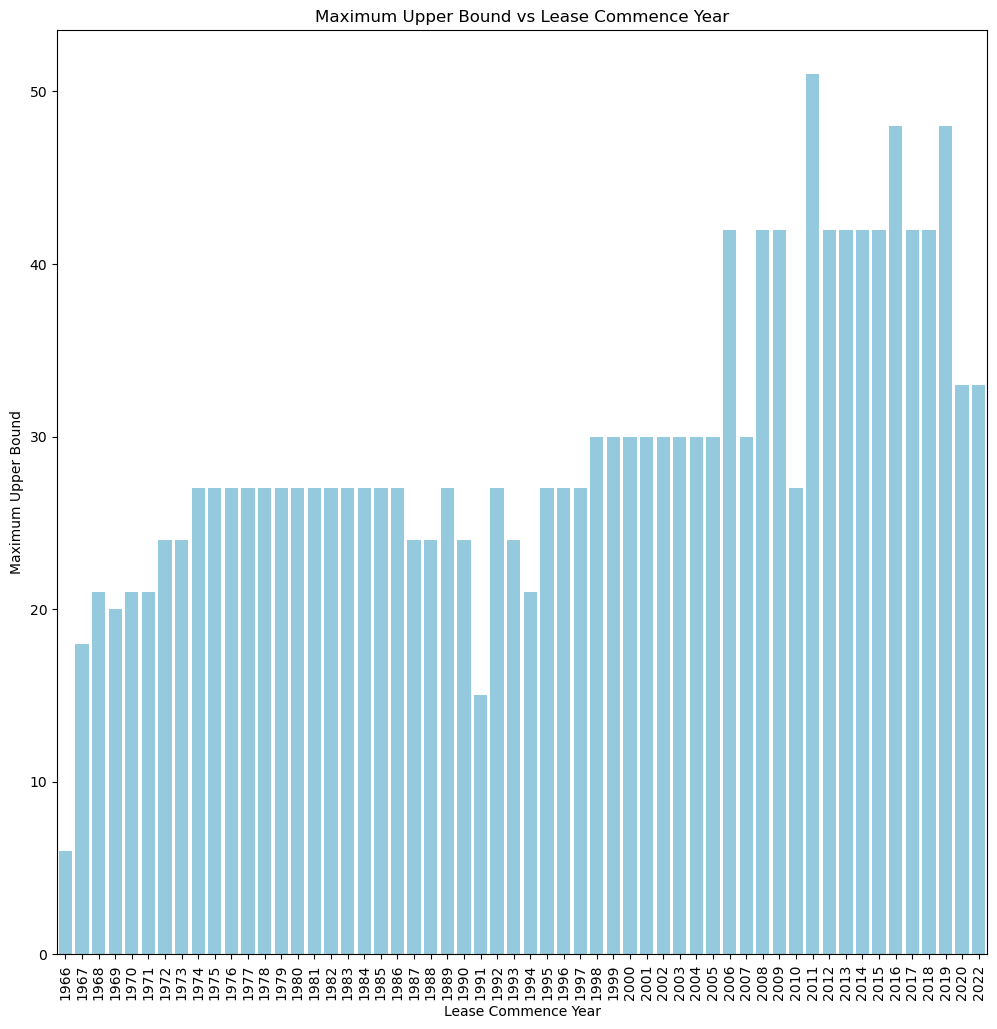

In [173]:
plt.figure(figsize=(12, 12))

# Group by lease_commence_year and find the maximum value of upper_bound for each group
max_upper_bound = df.groupby('lease_commence_date')['upper_bound'].max().reset_index()

# Create a bar plot using seaborn
sns.barplot(x='lease_commence_date', y='upper_bound', data=max_upper_bound, color='skyblue')

# Set plot labels and title
plt.title('Maximum Upper Bound vs Lease Commence Year')
plt.xlabel('Lease Commence Year')
plt.ylabel('Maximum Upper Bound')
plt.xticks(rotation=90)

# Show the plot
plt.show()


# Model Building and Evaluation

In [174]:
# X=df[['floor_area_sqm','price_per_sqm','years_holding','remaining_lease_asof2024','storey_median']]
# y=df['resale_price']

# # Normalizing the encoded data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [181]:
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame
categorical_feature = ['town', 'flat_type', 'storey_range', 'flat_model']
numeric_feature = ['floor_area_sqm', 'price_per_sqm', 'years_holding', 'remaining_lease_asof2024', 'resale_price']

# Apply one-hot encoding to the categorical feature
ohe = OneHotEncoder(handle_unknown='ignore')
X_cat = ohe.fit_transform(df[categorical_feature])

# You don't need to apply one-hot encoding to the numeric features, so just keep them as they are
X_num = df[numeric_feature]


# Splitting the Data for Training and Testing Purposes

In [182]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree Regressor

In [183]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1320 fits failed out of a total of 3960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-pac

Best hyperparameters: {'max_depth': 22, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2}
 
Mean squared error: 0.0005348045922034376
Mean Absolute Error 0.009415177132934969
Root Mean squared error: 0.023125842518780533
 
R-squared: 0.9985138102757617


# Testing Our Trained Model (Decision Tree Regressor)

In [ ]:
# new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
# new_sample = scaler.transform(new_sample[:, :5])
# new_pred = best_model.predict(new_sample)[0]
# np.exp(new_pred)

In [ ]:
# # Saving the model
# import pickle
# with open('model.pkl', 'wb') as file:
#     pickle.dump(best_model, file)
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

In [ ]:
# # Drop irrelevant columns
# selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
#                     'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
#                     'remaining_lease_asof2024', 'years_holding', 'resale_price']
# df1 = df[selected_columns]

# # Separate features (X) and target variable (y)
# X = df1.drop('resale_price', axis=1)
# y = df1['resale_price']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.linear_model import LinearRegression

# # Define preprocessing steps for numerical and categorical features
# numeric_features = ['year', 'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
#                     'remaining_lease_asof2024', 'years_holding']  # Ensure these columns exist in df

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
#     ('scaler', StandardScaler())  # Scale numerical features
# ])

# categorical_features = ['town', 'flat_type', 'storey_range', 'flat_model']  # Ensure these columns exist in df
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values with 'missing'
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
# ])

# # Combine preprocessing steps for numerical and categorical features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])



In [ ]:
# # LINEAR REGRESSION
# # Define the model
# model = LinearRegression()

# # Create and evaluate the pipeline
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('model', model)])

# # Fit the model
# pipeline.fit(X_train,y_train)

In [ ]:
# # Decision tree
# # Create the regression model
# model = DecisionTreeRegressor(random_state=42)

# # Create and evaluate the pipeline
# pipeline1 = Pipeline(steps=[('preprocessor', preprocessor),
#                              ('model', model)])

# # Fit the model
# pipeline1.fit(X_train, y_train)

In [ ]:
# # KNN REGRESION
# # Create the regression model
# model = KNeighborsRegressor()

# # Create and evaluate the pipeline
# pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
#                              ('model', model)])

# # Fit the model
# pipeline2.fit(X_train, y_train)

In [ ]:
# # CHECK METRICS

# # Predictions on the test set
# y_pred = pipeline.predict(X_test)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# explained_variance = explained_variance_score(y_test, y_pred)